In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from federated_learning.helper import utils

In [2]:
data = utils.load_leaf_train("../../data/leaf_non_iid/data/femnist/data")
# _, target = utils.load_leaf_train("../../data/leaf_non_iid/data/femnist/data")

In [3]:
list_keys = list(data.keys())

/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


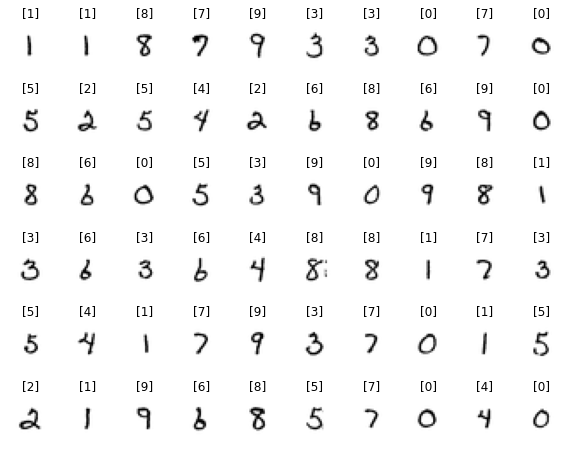

In [4]:
data_np = dict()
data_np['x'] = np.array(data[list_keys[2]]['x'], dtype = np.float32).reshape(-1, 28, 28)
data_np['y'] = np.array(data[list_keys[2]]['y'], dtype = np.int64).reshape(-1, 1)
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10,8))
for i in range(60):
    plt.subplot(6, 10, i + 1)
    plt.axis("off")
    plt.title(data_np['y'][i])
    plt.imshow(data_np['x'][i], cmap='gray')

In [5]:
min_num_samples = 100
only_digits = True
processed_data = utils.preprocess_leaf_data(data, min_num_samples, only_digits)

In [6]:
new_keys = list(processed_data.keys())
numbers = dict()
# numbers[num_samples] = num_users
for uu, dd in processed_data.items():
    key = str(len(dd['y']))
    if key in numbers:
        numbers[key] += 1
    else:
        numbers[key] = 1

print("Total Users:\t{}".format(len(new_keys)))
print("[{}]: Images: {}, Pixels: {}".format(
    new_keys[0], 
    len(processed_data[new_keys[0]]['x']), 
    processed_data[new_keys[0]]['x'][0].shape))

total_samples = 0
for uu in sorted(numbers.keys()):
    print("{}:\t{}".format(uu, numbers[uu]))
    total_samples += int(uu) * int(numbers[uu])

print("Mean num of samples/user: {}".format(
    round(np.mean([int(ii) for ii in numbers])), 2))

print("Total Samples:\t{}".format(total_samples))

Total Users:	2307
[f0554_17]: Images: 103, Pixels: (28, 28)
100:	76
101:	80
102:	79
103:	88
104:	111
105:	105
106:	135
107:	120
108:	143
109:	131
110:	131
111:	152
112:	139
113:	144
114:	166
115:	136
116:	138
117:	102
118:	45
119:	44
120:	26
121:	8
122:	6
123:	1
131:	1
Mean num of samples/user: 112.0
Total Samples:	253492


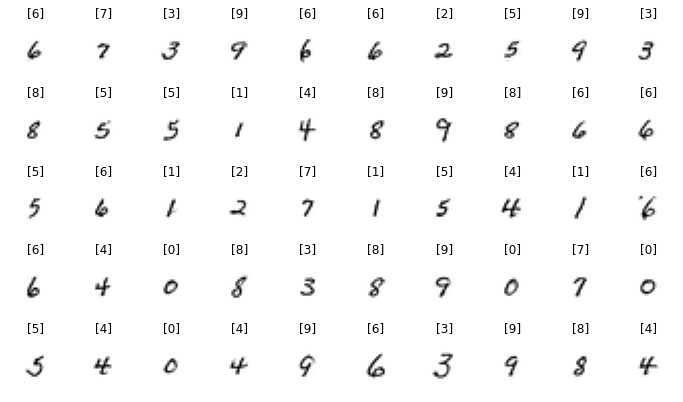

In [7]:
new_keys = list(processed_data.keys())
data_np = dict()
data_np['x'] = np.array(processed_data[new_keys[0]]['x'], dtype = np.float32).reshape(-1, 28, 28)
data_np['y'] = np.array(processed_data[new_keys[0]]['y'], dtype = np.int64).reshape(-1, 1)
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.axis("off")
    plt.title(data_np['y'][i])
    plt.imshow(data_np['x'][i], cmap='gray')

In [8]:
data_flatted_x = np.array([], dtype = np.float32).reshape(0, 28 * 28)
tmp_array = [np.array(data_['x'], dtype = np.float32).reshape(-1, 28 * 28) for data_ in processed_data.values()]
for dd in tmp_array:
    data_flatted_x = np.concatenate((data_flatted_x, dd))
print(data_flatted_x.shape)

data_flatted_y = np.array([], dtype = np.float32)
tmp_array_y = [np.array(data_['y'], dtype = np.int64).reshape(-1) for data_ in processed_data.values()]
for dd in tmp_array_y:
    data_flatted_y = np.concatenate((data_flatted_y, dd))
    
print(data_flatted_x.shape)
print(data_flatted_y.shape)

(253492, 784)
(253492, 784)
(253492,)


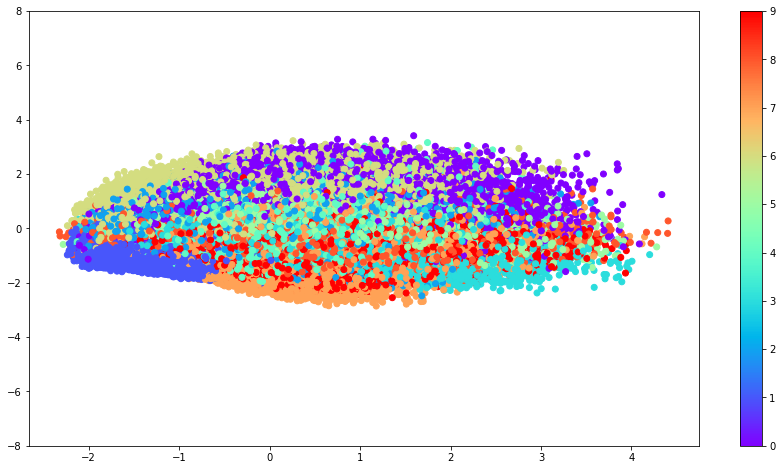

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

proj = pca.fit_transform(data_flatted_x)
figure = plt.figure(figsize=(15, 8))
plt.scatter(proj[:, 0], proj[:,1], c = data_flatted_y, cmap="rainbow")
plt.ylim([-8, 8])
plt.colorbar(ticks=range(len(np.unique(data_flatted_y))))